In [43]:
# Libraries:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [44]:
# read dataset file:
d = pd.read_csv("data_absent.csv")
# Remove the usless attribute:
d = d.drop(columns = ['ID'])

In [45]:
# Clustering the class of prediction into 6 labels:
d['Absent']= d['Absent'].replace(0, '0_days')
d['Absent']= d['Absent'].replace(range(1,25), '1_days')
d['Absent']= d['Absent'].replace(range(25,49), '2_days')
d['Absent']= d['Absent'].replace(range(49,73), '3_days')
d['Absent']= d['Absent'].replace(range(73,97), '4_days')
d['Absent']= d['Absent'].replace(range(97,121), '5_days')

In [46]:
# Y: the attribute of Absenteeism time, that i wan to predict:
y = d.Absent.values
# X_data: the input attributes for training the model (not ready):
x_data = d.drop('Absent',axis=1)

In [47]:
# Preprocessing techniques that scale values between (0,1):
scaler = MinMaxScaler(feature_range=(0,1))
# X: the input attributes for training the model (ready):
X = scaler.fit_transform(x_data)
# Empty lists for storing classifiers with their accuracy rates:
method_names=[]
method_scores=[]

In [48]:
# 1- Perceptron
perceptron = Perceptron(max_iter=5)
score_2 = cross_val_score(perceptron, X, y, cv=3, scoring = "accuracy")
print("Perceptron: ", score_2.mean())
method_names.append("Perceptron")
method_scores.append(score_2.mean())
# 2- stochastic gradient descent:
sgd = SGDClassifier(max_iter=5, tol=None)
score_3 = cross_val_score(sgd, X, y, cv=3, scoring = "accuracy")
print("Stochastic Gradient Descent: ", score_3.mean())
method_names.append("SGD")
method_scores.append(score_3.mean())
# 3- Logistic Regression :
log_reg = LogisticRegression()
score_4 = cross_val_score(log_reg, X, y, cv=3, scoring = "accuracy")
print("Logistic Regression: ", score_4.mean())
method_names.append("LR")
method_scores.append(score_4.mean())
# 4- KNN:
knn = KNeighborsClassifier(n_neighbors=5)
score_5 = cross_val_score(knn, X, y, cv=3, scoring = "accuracy")
print("K Neighbors: ", score_5.mean())
method_names.append("KNN")
method_scores.append(score_5.mean())
# 5- Random Forest:
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
score_8 = cross_val_score(rand_forest, X, y, cv=3, scoring = "accuracy")
print("Random Forest: ", score_8.mean())
method_names.append("RF")
method_scores.append(score_8.mean())

Perceptron:  0.930944826370527
Stochastic Gradient Descent:  0.9164022563017804
Logistic Regression:  0.9567468711440156
K Neighbors:  0.9526925788824254
Random Forest:  0.9124581350255596


Text(0, 0.5, 'Accurecy')

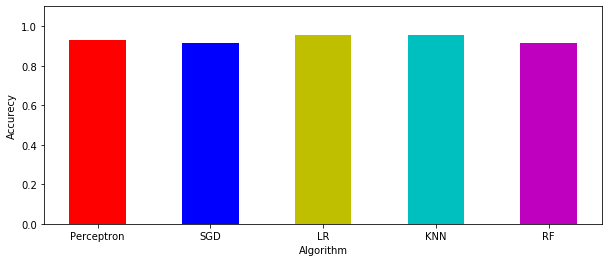

In [49]:
# Bar-Chart Plot for classifiers accuracy rate: 
plt.figure(figsize=(10,4))
plt.ylim([0.,1.1])
plt.bar(method_names,method_scores,width=0.5, color=['r','b','y','c','m'])
plt.xlabel('Algorithm')
plt.ylabel('Accurecy')